## sin曲线的多项式拟合

In [1]:
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [82]:
from sklearn.linear_model import LinearRegression 

#产生训练数据,N=10，100
N = 10
N_test = 200

x = np.linspace(0,1, 10*N)
y = np.sin(2 * np.pi * x)

#sin曲线
x_train = np.linspace(0,1,N)
y_star = np.sin(2 * np.pi * x_train)

#噪声
error = np.random.normal(loc=0,scale=0.3,size=N)

y_train = y_star + error

#测试集
x_test = np.linspace(0,1,N_test)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(loc=0,scale=0.3,size=N_test)

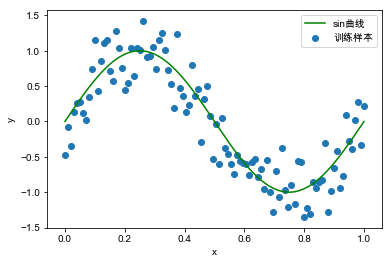

In [40]:
#显示训练数据
#plt.title(u"训练样本", fontsize=14)
plt.scatter(x_train, y_train, label = u'训练样本')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'g', label = u'sin曲线') 

plt.legend()
plt.show()

In [74]:
#10阶多项式
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  LinearRegression

M = 10
y_train_pred = np.zeros((M, N))
y_test_pred = np.zeros((M, N_test))
error_train =  np.zeros((M))
error_test =  np.zeros((M))

#10阶多项式
for m in range(0, M): 
    ploy = PolynomialFeatures(degree=m)
    
    X_train = ploy.fit_transform(x_train.reshape(-1,1))
    X_test = ploy.transform(x_test.reshape(-1,1))

    #模型训练
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    
     #预测
    y_train_pred[m] = lr.predict(X_train)
    y_test_pred[m] = lr.predict(X_test)

     
    #预测误差  
    res = y_train_pred[m] - y_train
    res = res * res
    error_train[m] = np.mean(res)    
    
    res = y_test_pred[m] - y_test
    res = res * res
    error_test[m] = np.mean(res) 

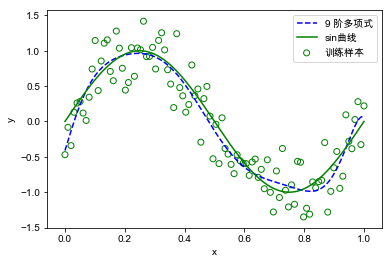

In [75]:
#plt.title("N = 10, M=9")
plt.scatter(x_train,y_train, color='', marker='o', edgecolors='g', label = u'训练样本')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_test, y_test_pred[9], 'b', linestyle='--', label = u'9 阶多项式') 

plt.plot(x, y, 'g', label = u'sin曲线') 


#res = y_train_pred[3] - y_train
#for i in range(0, N): 
    #plt.plot((x_train[i],x_train[i]), (y_train_pred[3,i],  y_train[i]), 'r') 

plt.legend()
plt.show()

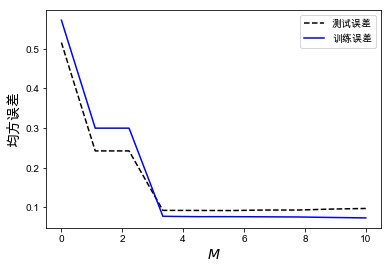

In [76]:
#plt.title("N = 10")

m_grid = np.linspace(0,10,10)
plt.plot(m_grid, error_test, 'k', label = u'测试误差', linestyle='--') 
plt.plot(m_grid, error_train, 'b', label = u'训练误差', linestyle='-') 

plt.xlabel('$\it{M}$', fontproperties = 'Times New Roman', size = 14)
plt.ylabel(u'均方误差', size = 14)

plt.legend()
plt.show()

In [77]:
best_index = np.argmin(error_test)
print("best index is %s" %best_index)

best index is 5


In [78]:
error_test

array([0.5155875 , 0.242312  , 0.24229098, 0.09233576, 0.09215952,
       0.09189058, 0.09319966, 0.09320563, 0.09561764, 0.09716821])

## 岭回归：L2正则

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  RidgeCV

#1. 设置超参数（正则参数）范围
alphas = [0.000005, 0.00001,0.0001, 0.001, 0.01, 0.1, 1]

#10阶多项式
M = 10
ploy = PolynomialFeatures(degree=M)
    
X_train = ploy.fit_transform(x_train.reshape(-1,1))
X_test = ploy.transform(x_test.reshape(-1,1))

#模型训练
ridge = RidgeCV(alphas=alphas, store_cv_values=True) 
ridge.fit(X_train, y_train)

    
#预测
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

     
#预测误差  
res = y_train_pred - y_train
res = res * res
error_train = np.mean(res)    
    
res = y_test_pred - y_test
res = res * res
error_test = np.mean(res) 

In [81]:
error_test

0.091645241305614

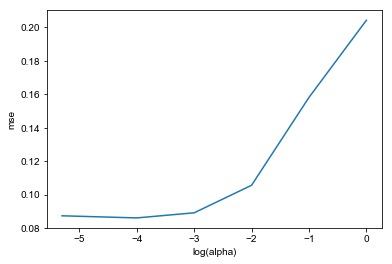

('alpha is:', 0.0001)


In [80]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

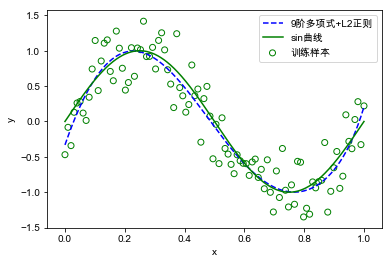

In [62]:
plt.scatter(x_train,y_train, color='', marker='o', edgecolors='g', label = u'训练样本')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_test, y_test_pred, 'b', linestyle='--', label = u'9阶多项式+L2正则') 

plt.plot(x, y, 'g', label = u'sin曲线') 


#res = y_train_pred[3] - y_train
#for i in range(0, N): 
    #plt.plot((x_train[i],x_train[i]), (y_train_pred[i],  y_train[i]), 'r') 

plt.legend()
plt.show()

## L1正则

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  LassoCV

#1. 设置超参数（正则参数）范围
alphas = [0.000005, 0.00001,0.0001, 0.001, 0.01, 0.1, 1]

#10阶多项式
M = 10
ploy = PolynomialFeatures(degree=M)
    
X_train = ploy.fit_transform(x_train.reshape(-1,1))
X_test = ploy.transform(x_test.reshape(-1,1))

#模型训练
lasso = LassoCV(alphas = alphas)  
lasso.fit(X_train, y_train)

    
#预测
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

     
#预测误差  
res = y_train_pred - y_train
res = res * res
error_train = np.mean(res)    
    
res = y_test_pred - y_test
res = res * res
error_test = np.mean(res) 

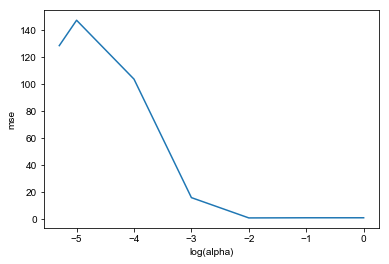

('alpha is:', 0.01)


In [84]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

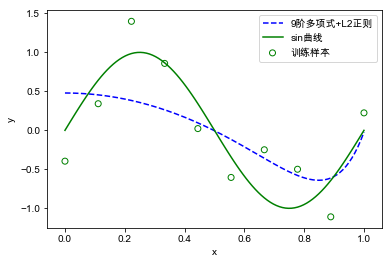

In [85]:
plt.scatter(x_train,y_train, color='', marker='o', edgecolors='g', label = u'训练样本')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_test, y_test_pred, 'b', linestyle='--', label = u'9阶多项式+L2正则') 

plt.plot(x, y, 'g', label = u'sin曲线') 


#res = y_train_pred[3] - y_train
#for i in range(0, N): 
    #plt.plot((x_train[i],x_train[i]), (y_train_pred[i],  y_train[i]), 'r') 

plt.legend()
plt.show()